In [1]:
import pandas as pd

In [2]:
import numpy as np

In [11]:
import re

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, accuracy_score,mean_squared_error,mean_absolute_error

In [206]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [71]:
pd.set_option('display.max_columns', None)

In [133]:
df=pd.read_csv('laptop_price.csv', sep=',', encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD


In [136]:
set(df['Karta Graficzna'])

{'AMD FirePro',
 'AMD R',
 'AMD Radeon',
 'Intel Graphics',
 'Intel HD',
 'Intel Iris',
 'Intel UHD',
 'Nvidia GTX',
 'Nvidia GeForce',
 'Nvidia Quadro'}

In [134]:
df['Karta_Graficzna'] = [1 if df['Karta Graficzna'][i] == 'Amd FirePro' 
                         else 2 if df['Karta Graficzna'][i] == 'AMD R'
                         else 3 if df['Karta Graficzna'][i] == 'AMD Radeon'
                         else 4 if df['Karta Graficzna'][i] == 'Intel Graphics'
                         else 5 if df['Karta Graficzna'][i] == 'Intel HD'
                         else 6 if df['Karta Graficzna'][i] == 'Intel Iris'
                         else 7 if df['Karta Graficzna'][i] == 'Intel UHD'
                         else 8 if df['Karta Graficzna'][i] == 'Nvidia GTX'
                         else 9 if df['Karta Graficzna'][i] == 'Nvidia GeForce'
                         else 10 
                         for i in range(len(df))]

In [135]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6


In [137]:
set(df['Procesor'])

{'AMD FX',
 'AMD Ryzen',
 'AMD Series',
 'Intel',
 'Intel Core-i3',
 'Intel Core-i5',
 'Intel Core-i7',
 'Intel Xeon'}

In [138]:
df['procesor'] = [1 if df['Procesor'][i] == 'AMD FX' 
                 else 2 if df['Procesor'][i] == 'AMD Ryzen'
                 else 3 if df['Procesor'][i] == 'AMD Series'
                 else 4 if df['Procesor'][i] == 'Intel'
                 else 5 if df['Procesor'][i] == 'Intel Core-i3'
                 else 6 if df['Procesor'][i] == 'Intel Core-i5'
                 else 7 if df['Procesor'][i] == 'Intel Core-i7'
                 else 8 
                 for i in range(len(df))]

In [139]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna,procesor
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6,6
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5,6
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5,6
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3,7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6,6


In [140]:
set(df['procesor'])

{1, 2, 3, 4, 5, 6, 7, 8}

In [141]:
set(df['Memory_type'])

{'Flash_Storage', 'HDD', 'Hybrid', 'SSD'}

In [142]:
df['memory_type'] = [1 if df['Memory_type'][i] == 'Flash_Storage' 
                 else 2 if df['Memory_type'][i] == 'HDD'
                 else 3 if df['Memory_type'][i] == 'Hybrid'
                 else 4 
                 for i in range(len(df))]

In [143]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna,procesor,memory_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6,6,4
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5,6,1
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5,6,4
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3,7,4
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6,6,4


In [159]:
set(df['TypeName'])

{'2 in 1 Convertible',
 'Gaming',
 'Netbook',
 'Notebook',
 'Ultrabook',
 'Workstation'}

In [160]:
df['type_name'] = [1 if df['TypeName'][i] == '2 in 1 Convertible' 
                 else 2 if df['TypeName'][i] == 'Gaming'
                 else 3 if df['TypeName'][i] == 'Netbook'
                 else 4 if df['TypeName'][i] == 'Notebook'
                 else 5 if df['TypeName'][i] == 'Ultrabook'
                 else 6
                 for i in range(len(df))]

In [161]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna,procesor,memory_type,Price,type_name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6,6,4,7.200194,5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5,6,1,6.801216,5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5,6,4,6.354370,4
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3,7,4,7.838915,5
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6,6,4,7.497540,5


In [162]:
df.describe()

,laptop_ID,Inches,RamGB,Weight,Price_euros,TaktGHz,Memory,Karta_Graficzna,procesor,memory_type,Price,type_name
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,659.734255,15.019278,8.385561,2.039416,1124.043894,2.299002,594.347158,6.115207,5.927035,2.954685,6.839440,3.584485
std,381.014613,1.424861,5.085166,0.665274,699.158856,0.506467,445.630603,2.178562,1.205314,1.068135,0.624005,1.243648
min,1.000000,10.100000,2.000000,0.690000,174.000000,0.900000,8.000000,2.000000,1.000000,1.000000,5.159055,1.000000
25%,331.250000,14.000000,4.000000,1.500000,599.000000,2.000000,256.000000,5.000000,5.000000,2.000000,6.395262,3.000000
50%,658.500000,15.600000,8.000000,2.040000,978.000000,2.500000,500.000000,5.000000,6.000000,3.000000,6.885509,4.000000
75%,989.750000,15.600000,8.000000,2.300000,1488.435000,2.700000,1024.000000,9.000000,7.000000,4.000000,7.305480,4.000000
max,1320.000000,18.400000,64.000000,4.700000,6099.000000,3.600000,2560.000000,10.000000,8.000000,4.000000,8.715880,6.000000


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1302 non-null   int64  
 1   Company           1302 non-null   object 
 2   Product           1300 non-null   object 
 3   TypeName          1302 non-null   object 
 4   Inches            1302 non-null   float64
 5   ScreenResolution  1302 non-null   object 
 6   RamGB             1302 non-null   int64  
 7   OpSys             1302 non-null   object 
 8   Weight            1302 non-null   float64
 9   Price_euros       1302 non-null   float64
 10  Procesor          1302 non-null   object 
 11  TaktGHz           1302 non-null   float64
 12  Karta Graficzna   1302 non-null   object 
 13  Memory            1302 non-null   int64  
 14  Memory_type       1302 non-null   object 
 15  Karta_Graficzna   1302 non-null   int64  
 16  procesor          1302 non-null   int64  


In [164]:
set(df['RamGB'])

{2, 4, 6, 8, 12, 16, 24, 32, 64}

In [148]:
df['RamGB'].dtype

dtype('int64')

In [165]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna,procesor,memory_type,Price,type_name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6,6,4,7.200194,5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5,6,1,6.801216,5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5,6,4,6.354370,4
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3,7,4,7.838915,5
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6,6,4,7.497540,5


In [166]:
df.Company.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [79]:
#df['Weight1'] = df['Weight'].replace(['kg'],[''], regex=True)

In [168]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna,procesor,memory_type,Price,type_name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6,6,4,7.200194,5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5,6,1,6.801216,5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5,6,4,6.354370,4
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3,7,4,7.838915,5
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6,6,4,7.497540,5


In [84]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [167]:
company = pd.get_dummies(df['Company'])
company

,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1298,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1299,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1300,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Price_euros', ylabel='Count'>

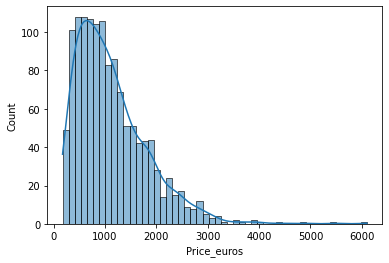

In [153]:
sns.histplot(df['Price_euros'], kde = True, bins=50)

In [154]:
z = [np.log(df['Price_euros'])]
z

[0       7.200194
 1       6.801216
 2       6.354370
 3       7.838915
 4       7.497540
           ...   
 1297    6.458338
 1298    7.312553
 1299    5.433722
 1300    6.638568
 1301    5.910797
 Name: Price_euros, Length: 1302, dtype: float64]

<AxesSubplot:ylabel='Count'>

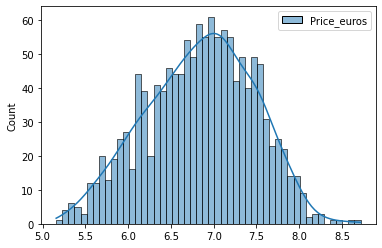

In [155]:
sns.histplot(z, kde = True, bins=50)

In [156]:
df['Price'] = np.log(df['Price_euros'])

In [169]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna,procesor,memory_type,Price,type_name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6,6,4,7.200194,5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5,6,1,6.801216,5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5,6,4,6.354370,4
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3,7,4,7.838915,5
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6,6,4,7.497540,5


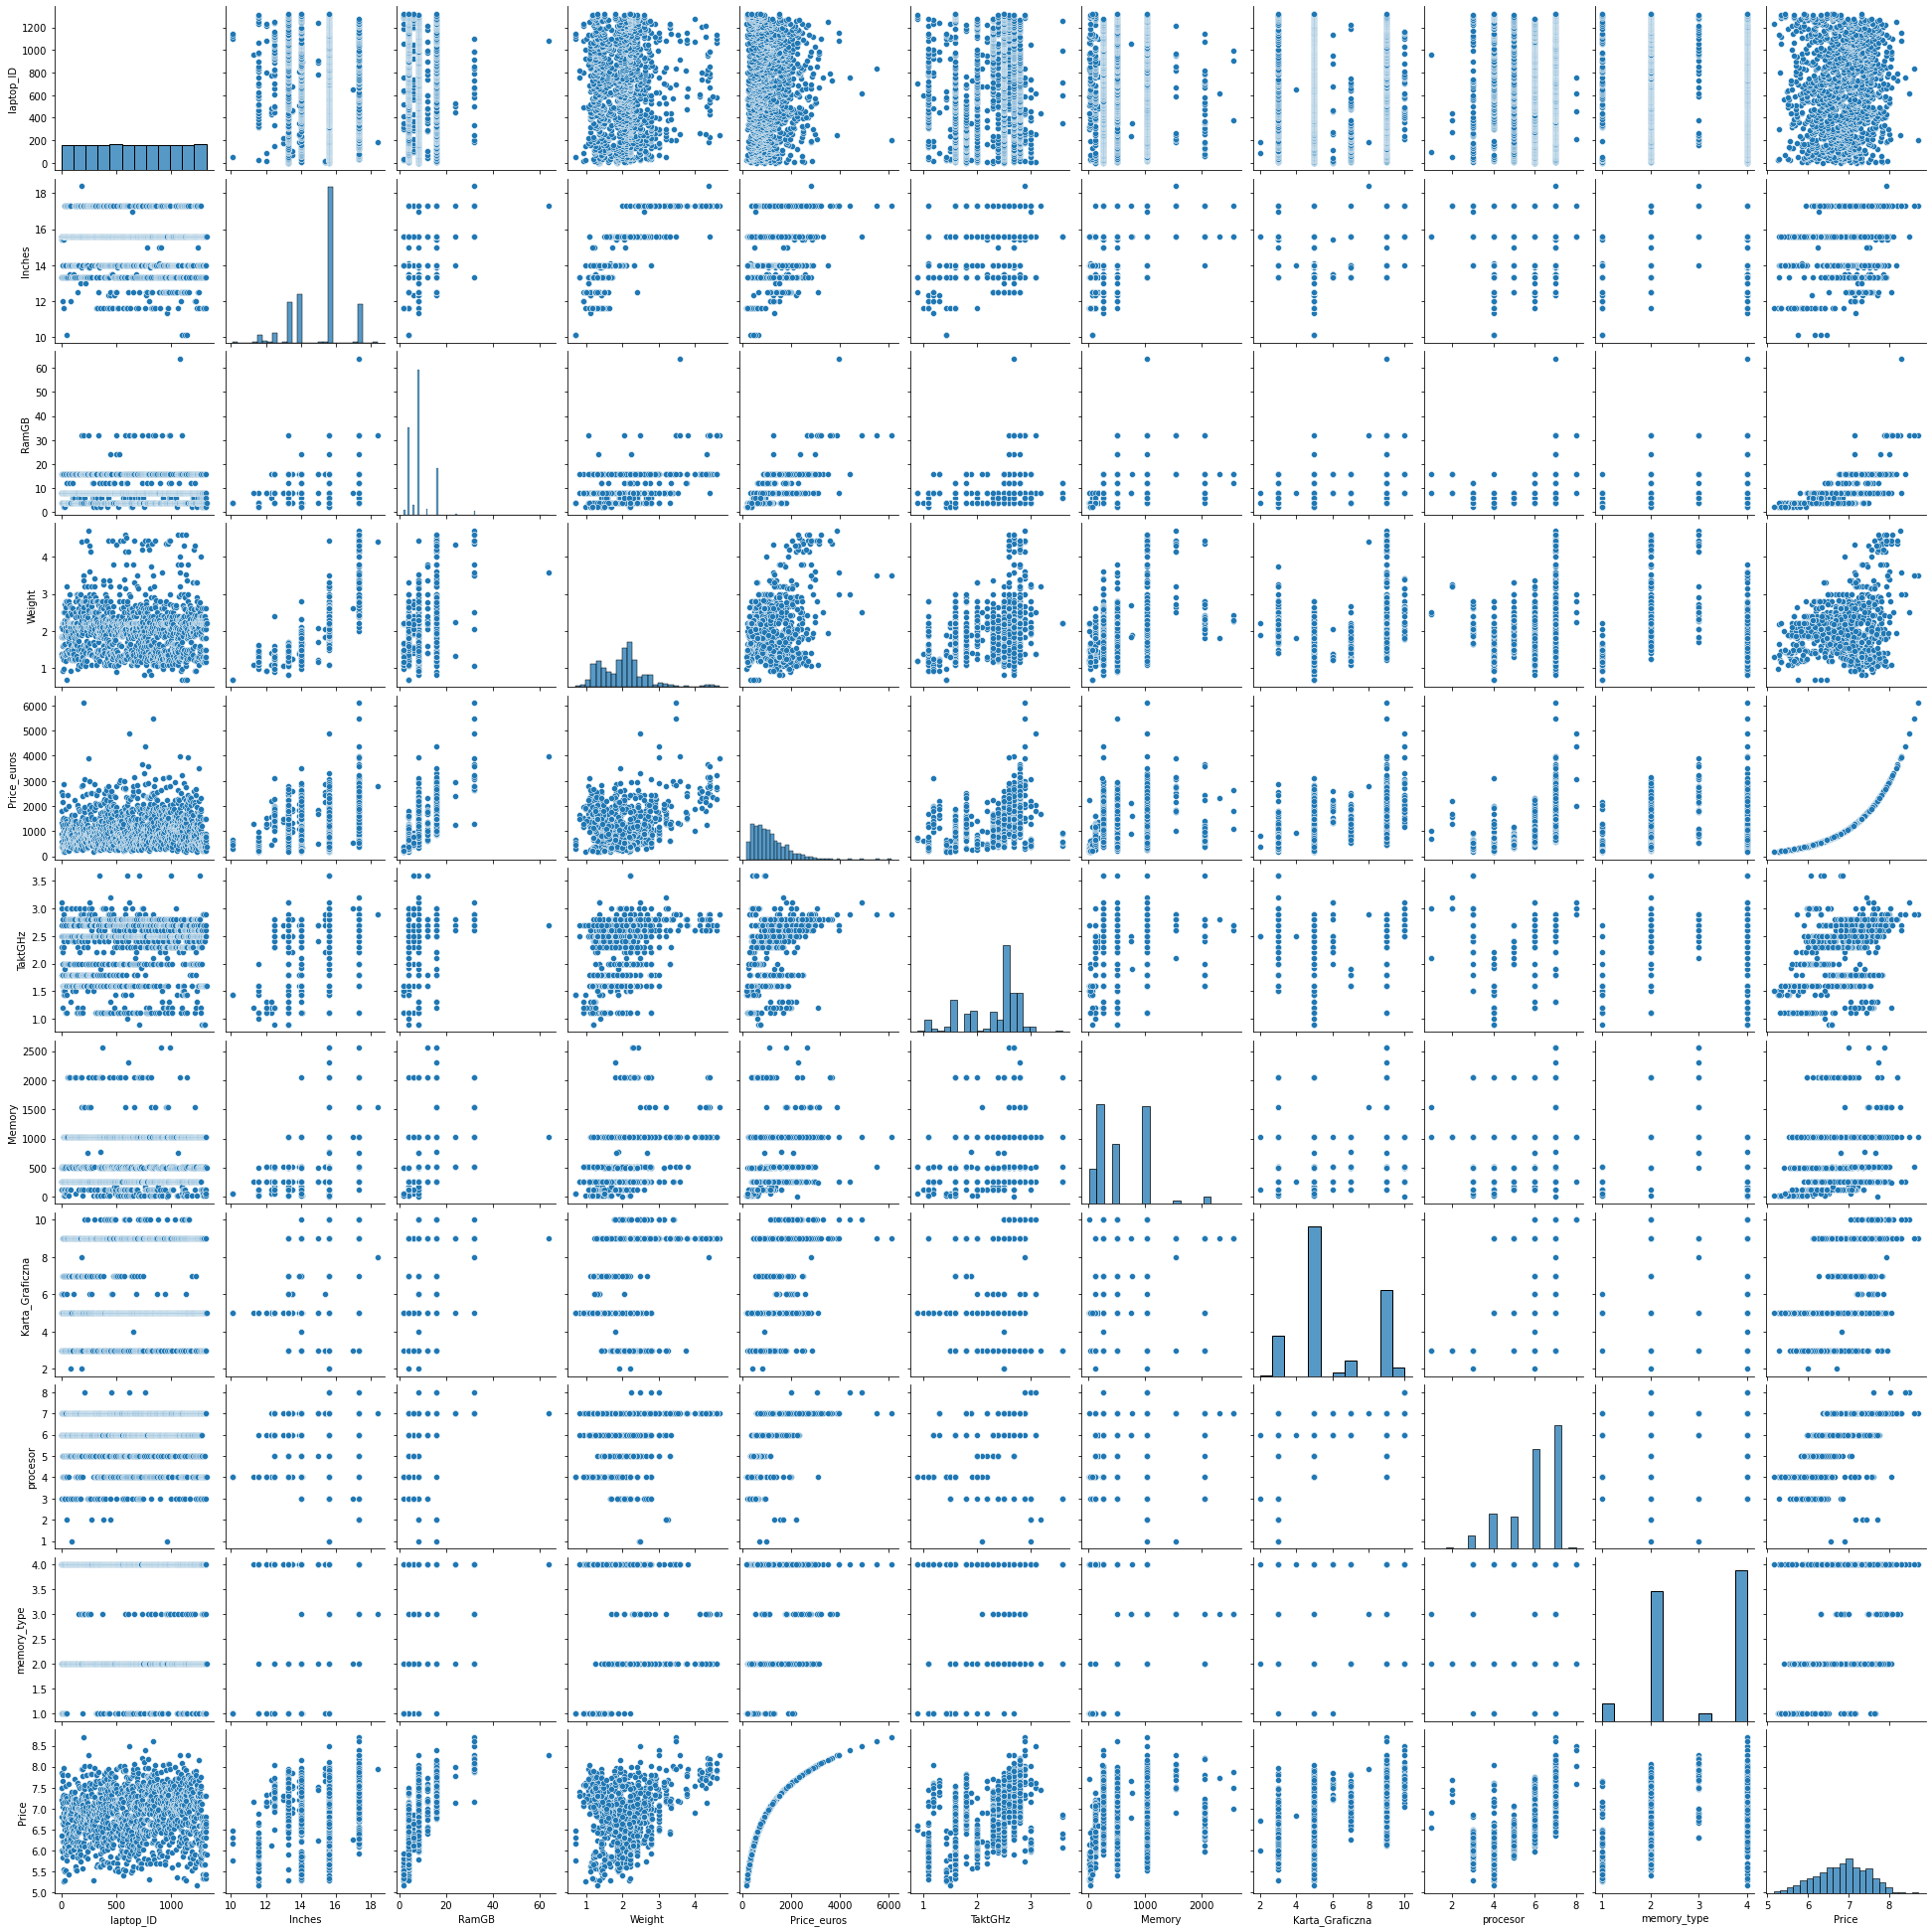

In [158]:
#sns.pairplot(df)

In [170]:
df = pd.concat([df, company], axis=1)

In [171]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna,procesor,memory_type,Price,type_name,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6,6,4,7.200194,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5,6,1,6.801216,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5,6,4,6.354370,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3,7,4,7.838915,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6,6,4,7.497540,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [172]:
df.drop('laptop_ID', axis = 1, inplace=True)

In [173]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna,procesor,memory_type,Price,type_name,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6,6,4,7.200194,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5,6,1,6.801216,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5,6,4,6.354370,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3,7,4,7.838915,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6,6,4,7.497540,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

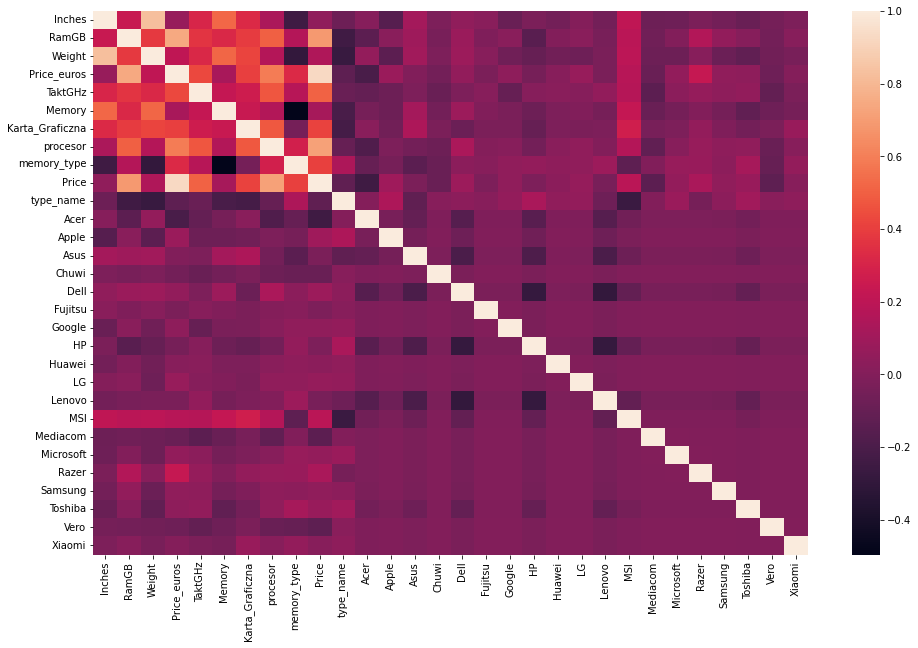

In [174]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Company', ylabel='count'>

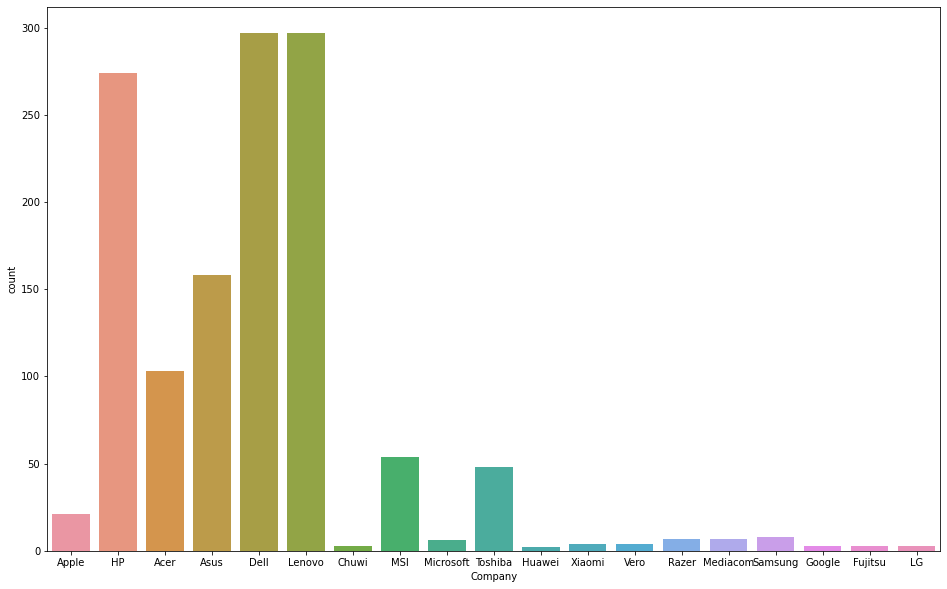

In [175]:
plt.figure(figsize=(16,10))
sns.countplot(data=df, x = 'Company')

<AxesSubplot:xlabel='RamGB', ylabel='Price_euros'>

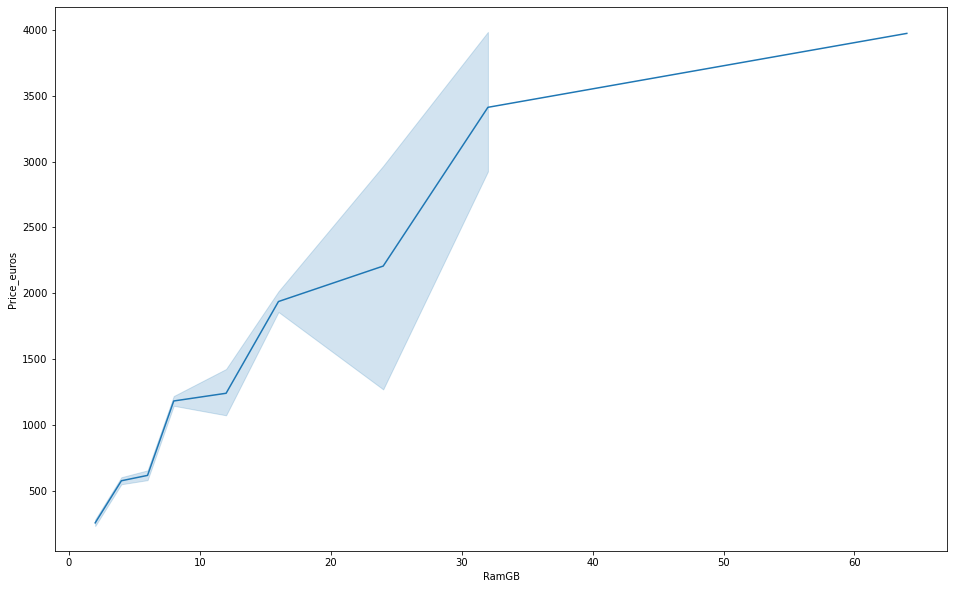

In [177]:
plt.figure(figsize=(16,10))
sns.lineplot(data=df, x = 'RamGB', y = 'Price_euros')

### Model1

In [178]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna,procesor,memory_type,Price,type_name,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6,6,4,7.200194,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5,6,1,6.801216,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5,6,4,6.354370,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3,7,4,7.838915,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6,6,4,7.497540,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [179]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'RamGB',
       'OpSys', 'Weight', 'Price_euros', 'Procesor', 'TaktGHz',
       'Karta Graficzna', 'Memory', 'Memory_type', 'Karta_Graficzna',
       'procesor', 'memory_type', 'Price', 'type_name', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi'],
      dtype='object')

In [181]:
X1 = df[['Inches', 'RamGB', 'Weight', 'TaktGHz', 'Memory', 'Karta_Graficzna',
       'procesor', 'memory_type', 'type_name', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi']]

In [182]:
y1 = df['Price_euros']

In [185]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y1, test_size=0.2, random_state=123)

## Regresja liniowa

In [186]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

LinearRegression()

In [187]:
predict1 = model1.predict(X_test1)

In [188]:
r2_score(y_test1, predict1)

0.7645194255346064

In [189]:
model1.coef_

array([-1.28529918e+02,  7.14002636e+01,  2.11145160e+02,  1.51629064e+02,
       -1.58955289e-03,  3.19883279e+01,  9.42374111e+01,  1.01519057e+02,
        2.86207572e+01, -3.52884370e+02,  2.50098862e+02, -1.36600148e+02,
       -5.55711764e+01, -1.56847017e+02, -4.35619662e+02,  1.20449147e+02,
       -4.51195040e+01, -6.50855965e+01,  7.57255985e+02, -1.66074705e+02,
        5.29763067e+01, -2.83454495e+02, -4.81950148e+01,  1.42858850e+03,
       -8.95560510e+01, -1.22174685e+02, -8.20298902e+01, -5.70156488e+02])

In [190]:
cdf = pd.DataFrame(model1.coef_, X1.columns, columns=['Coeffecient'])
cdf

,Coeffecient
Inches,-128.529918
RamGB,71.400264
Weight,211.145160
TaktGHz,151.629064
Memory,-0.001590
Karta_Graficzna,31.988328
procesor,94.237411
memory_type,101.519057
type_name,28.620757
Acer,-352.884370


In [191]:
model1.intercept_

651.7800034414245

In [192]:
price_model1 = df['Price_euros']
predict_price_model1 = pd.Series(predict1)
error_model1 = price_model1 - predict_price_model1
data_pedict_model1 = pd.DataFrame({'price':price_model1,
                                  'Predict_price' : predict_price_model1,
                                  'Error' : error_model1})
data_pedict_model1.head()

,price,Predict_price,Error
0,1339.69,1379.047496,-39.357496
1,898.94,29.023075,869.916925
2,575.00,460.323802,114.676198
3,2537.45,1273.450735,1263.999265
4,1803.60,1271.465966,532.134034


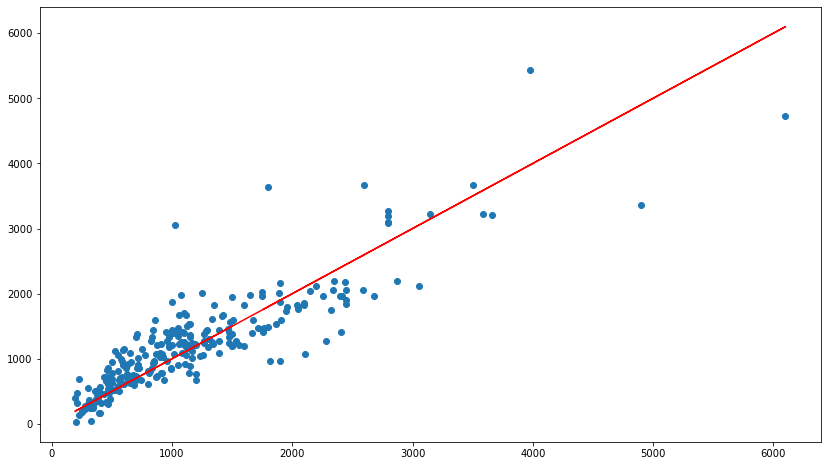

In [193]:
plt.figure(figsize=(14,8))
plt.scatter(y_test1, predict1)
plt.plot(y_test1, y_test1, color = 'red')

## Model2 Price

In [194]:
X2 = df[['Inches', 'RamGB', 'Weight', 'TaktGHz', 'Memory', 'Karta_Graficzna',
       'procesor', 'memory_type', 'type_name', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi']]

In [195]:
y2 = df['Price']

In [196]:
X_train2, X_test2, y_train2, y_test2 = train_test_split( X2, y2, test_size=0.2, random_state=123)

## Regresja liniowa

In [197]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression()

In [198]:
predict2 = model2.predict(X_test2)

In [199]:
r2_score(y_test2, predict2)

0.8020874373399288

In [200]:
model2.coef_

array([-9.62375215e-02,  4.94255737e-02,  9.41387536e-02,  1.99888538e-01,
        8.74995998e-05,  3.23353186e-02,  1.46961348e-01,  1.30681562e-01,
        2.97638096e-04, -2.54390467e-01,  5.27130756e-01, -2.15865745e-02,
       -2.77574447e-01, -4.53434300e-03, -2.34713318e-01,  3.25517916e-01,
        5.80924521e-02,  8.46678609e-02,  5.54055376e-01, -8.24262948e-02,
        1.12872269e-01, -4.93760751e-01,  1.59775022e-01,  1.60960433e-01,
       -6.39777629e-03,  5.42442933e-02, -3.98183486e-01, -2.63748922e-01])

In [201]:
cdf2 = pd.DataFrame(model2.coef_, X2.columns, columns=['Coeffecient'])
cdf2

,Coeffecient
Inches,-0.096238
RamGB,0.049426
Weight,0.094139
TaktGHz,0.199889
Memory,0.000087
Karta_Graficzna,0.032335
procesor,0.146961
memory_type,0.130682
type_name,0.000298
Acer,-0.254390


In [202]:
model2.intercept_

5.737555976064414

In [203]:
price_model2 = df['Price']
predict_price_model2 = pd.Series(predict2)
error_model2 = price_model2 - predict_price_model2
data_pedict_model2 = pd.DataFrame({'price':price_model2,
                                  'Predict_price' : predict_price_model2,
                                  'Error' : error_model2})
data_pedict_model2.head()

,price,Predict_price,Error
0,7.200194,7.119975,0.080218
1,6.801216,5.595219,1.205997
2,6.354370,6.041703,0.312667
3,7.838915,7.108705,0.730210
4,7.497540,7.022181,0.475359


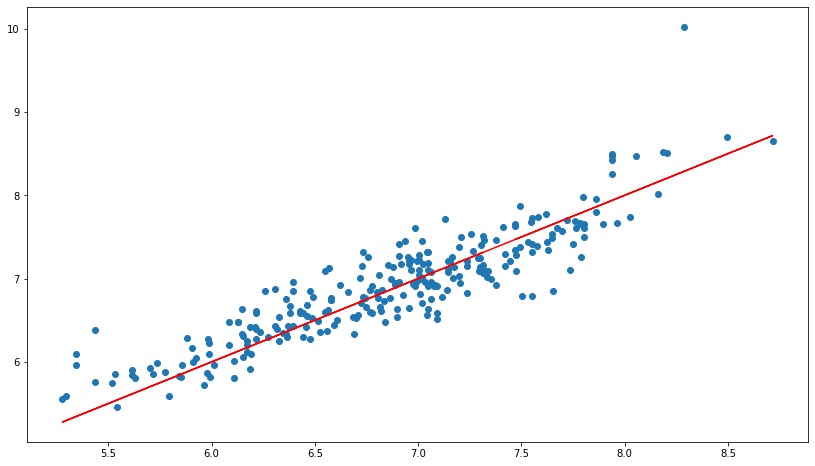

In [204]:
plt.figure(figsize=(14,8))
plt.scatter(y_test2, predict2)
plt.plot(y_test2, y_test2, color = 'red')

## Regresja wielomianowa

## Model1

In [207]:
poly1 = PolynomialFeatures(degree=4)

In [209]:
X_train_poly1 = poly1.fit_transform(X_train1)

In [211]:
X_test_poly1 = poly1.transform(X_test1)

In [212]:
poly_model1 = LinearRegression()
poly_model1.fit(X_train_poly1, y_train1)

LinearRegression()

In [213]:
poly_predict1 = poly_model1.predict(X_test_poly1)

In [214]:
r2_score(y_test1, poly_predict1)

-42718212.1316264

In [216]:
score_poly = poly_model1.score(X_train_poly1, y_train1)
score_poly

0.9882307889176444

In [217]:
poly_model1.coef_

array([-1.27488008e+01, -2.49025365e+01,  1.45154497e+01, ...,
        0.00000000e+00,  0.00000000e+00,  8.71493265e-10])

In [224]:
cdfpoly1 = pd.DataFrame(poly_model1.coef_, columns=['Coeffecient'])
cdfpoly1

,Coeffecient
0,-1.274880e+01
1,-2.490254e+01
2,1.451545e+01
3,7.924634e+00
4,-3.150859e+00
...,...
35955,-4.112634e-05
35956,0.000000e+00
35957,0.000000e+00
35958,0.000000e+00


In [225]:
poly_model1.intercept_

112844.6883010986

In [227]:
price_model_poly1 = df['Price_euros']
predict_price_model_poly1 = pd.Series(poly_predict1)
error_model_poly1 = price_model_poly1 - predict_price_model_poly1
data_pedict_model_poly1 = pd.DataFrame({'price':price_model_poly1,
                                  'Predict_price' : predict_price_model_poly1,
                                  'Error' : error_model_poly1})
data_pedict_model_poly1.head()

,price,Predict_price,Error
0,1339.69,11510.955330,-10171.265330
1,898.94,113801.677442,-112902.737442
2,575.00,22658.277516,-22083.277516
3,2537.45,2500.537984,36.912016
4,1803.60,6230.633453,-4427.033453


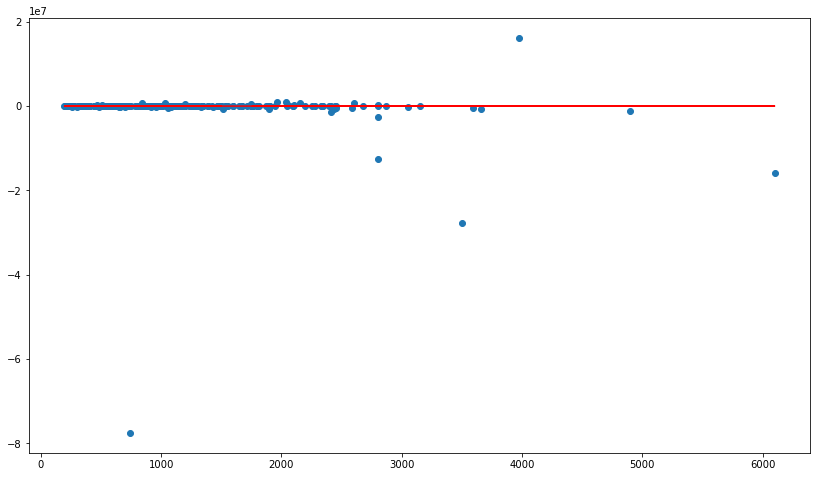

In [228]:
plt.figure(figsize=(14,8))
plt.scatter(y_test1, poly_predict1)
plt.plot(y_test1, y_test1, color = 'red')

### Model2

In [229]:
poly2 = PolynomialFeatures(degree=4)

In [230]:
X_train_poly2 = poly2.fit_transform(X_train2)

In [231]:
X_test_poly2 = poly2.transform(X_test2)

In [232]:
poly_model2 = LinearRegression()
poly_model2.fit(X_train_poly2, y_train2)

LinearRegression()

In [233]:
poly_predict2 = poly_model2.predict(X_test_poly2)

In [234]:
r2_score(y_test1, poly_predict1)

-42718212.1316264

In [235]:
score_poly2 = poly_model2.score(X_train_poly2, y_train2)
score_poly2

0.9897917825705327

In [236]:
poly_model2.coef_

array([-1.47943356e-02, -2.77451334e-02,  2.52072175e-02, ...,
        0.00000000e+00,  0.00000000e+00, -7.98335062e-13])

In [237]:
cdfpoly2 = pd.DataFrame(poly_model2.coef_, columns=['Coeffecient'])
cdfpoly2

,Coeffecient
0,-1.479434e-02
1,-2.774513e-02
2,2.520722e-02
3,7.835108e-03
4,-1.192492e-03
...,...
35955,-2.560801e-08
35956,0.000000e+00
35957,0.000000e+00
35958,0.000000e+00


In [238]:
poly_model2.intercept_

89.31270794111724

In [239]:
price_model_poly2 = df['Price']
predict_price_model_poly2 = pd.Series(poly_predict2)
error_model_poly2 = price_model_poly2 - predict_price_model_poly2
data_pedict_model_poly2 = pd.DataFrame({'price':price_model_poly2,
                                  'Predict_price' : predict_price_model_poly2,
                                  'Error' : error_model_poly2})
data_pedict_model_poly2.head()

,price,Predict_price,Error
0,7.200194,13.425592,-6.225398
1,6.801216,93.507026,-86.705810
2,6.354370,23.401465,-17.047095
3,7.838915,7.822994,0.015920
4,7.497540,11.940452,-4.442912


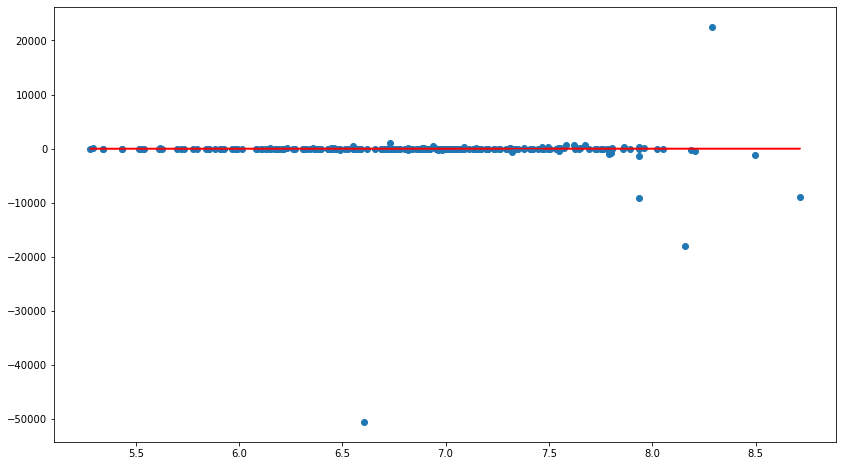

In [240]:
plt.figure(figsize=(14,8))
plt.scatter(y_test2, poly_predict2)
plt.plot(y_test2, y_test2, color = 'red')